<a href="https://colab.research.google.com/github/hmulli2/Anomaly-Detection-IP-Address/blob/main/IP_Address_Anomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [435]:
import datetime
import pandas as pd
import numpy as np

In [436]:
import matplotlib as plt
import matplotlib.pyplot as pyplot

In [437]:
df = pd.read_csv('/content/drive/MyDrive/henry.csv')
df.head(10)

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,192.168.5.143,52.85.151.42,TLSv1.2,100,Application Data
1,2,0.000030,192.168.5.143,35.244.181.201,TLSv1.2,100,Application Data
2,3,0.000060,52.85.151.42,192.168.5.143,TCP,60,443 > 59404 [ACK] Seq=1 Ack=47 Win=64240 Len=0
3,4,0.000091,35.244.181.201,192.168.5.143,TCP,60,443 > 42464 [ACK] Seq=1 Ack=47 Win=64240 Len=0
4,5,0.000236,192.168.5.143,52.85.151.42,TLSv1.2,85,Encrypted Alert
5,6,0.000236,192.168.5.143,52.85.151.42,TCP,60,"59404 > 443 [FIN, ACK] Seq=78 Ack=1 Win=6336..."
6,7,0.000264,52.85.151.42,192.168.5.143,TCP,60,443 > 59404 [ACK] Seq=1 Ack=78 Win=64240 Len=0
7,8,0.000308,52.85.151.42,192.168.5.143,TCP,60,443 > 59404 [ACK] Seq=1 Ack=79 Win=64239 Len=0
8,9,0.000459,192.168.5.143,35.244.181.201,TLSv1.2,85,Encrypted Alert
9,10,0.000459,35.244.181.201,192.168.5.143,TCP,60,443 > 42464 [ACK] Seq=1 Ack=78 Win=64240 Len=0


In [439]:
print(len(df['Source'].unique()))


29


In [ ]:
pca_src = PCA(n_components=2)
pcas = pca_src.fit_transform(X_matrix_src)

pca_dest = PCA(n_components=2)
pcad = pca_dest.fit_transform(X_matrix_dst)

pcas1=[]
pcas2=[]

pcad1=[]
pcad2=[]


#source
for i in pcas:
    pcas1.append(i[0])
    pcas2.append(i[1])
    
#destination
for i in pcad:
    pcad1.append(i[0])
    pcad2.append(i[1])
    
print(len(pcas1))
print(len(pcas2))

print(len(pcad1))
print(len(pcad2))

24
24
24
24


In [ ]:
print(pcas.shape)
print(pcad.shape)

(24, 2)
(24, 2)


In [ ]:
src_ip_df['pca1'] = pcas1
src_ip_df['pca2'] = pcas2
print(src_ip_df[:2])
print()
#dst_ip_df['pca1'] = pcad1
#dst_ip_df['pca2'] = pcad2

#print(dst_ip_df[:2])

   index        Source oct1 oct2 oct3 oct4       pca1       pca2
0      0   87.73.96.64   87   73   96   64  86.204557 -30.905306
1      2  52.85.151.42   52   85  151   42  95.616816 -39.585648



In [394]:
print(len(df['Source'].unique()))
print(len(df['Destination'].unique()))

29
28


In [ ]:
print(df['Source'])

In [395]:
df.Protocol.value_counts()

TCP        391
TLSv1.3    113
DNS         52
HTTP        45
ARP         20
QUIC        18
NTP          8
DHCPv6       7
TLSv1.2      6
OCSP         2
Name: Protocol, dtype: int64

In [396]:
# Drop rows for Protocal countries:
df = df[df.Protocol != 'ARP']


In [397]:
df = df[df.Protocol != 'DHCPv6']

In [398]:
df.Protocol.value_counts()

TCP        391
TLSv1.3    113
DNS         52
HTTP        45
QUIC        18
NTP          8
TLSv1.2      6
OCSP         2
Name: Protocol, dtype: int64

In [399]:
src_ip_df = df['Source'].copy()
dst_ip_df = df['Destination'].copy()
src_ip_df = src_ip_df.reset_index()


dst_ip_df = dst_ip_df.reset_index()


In [400]:
print(src_ip_df.shape)
src_ip_df.head(5)


(635, 2)


,index,Source
0,0,87.73.96.64
1,1,87.73.96.64
2,2,52.85.151.42
3,3,35.244.181.201
4,4,87.73.96.64


In [401]:
print(dst_ip_df.shape)
dst_ip_df.head(5)

(635, 2)


,index,Destination
0,0,52.85.151.42
1,1,35.244.181.201
2,2,87.73.96.64
3,3,87.73.96.64
4,4,52.85.151.42


In [402]:
src_ip_df['Source'].isnull().sum()

0

In [403]:
dst_ip_df['Destination'].isnull().sum()

0

In [404]:
display(src_ip_df)

,index,Source
0,0,87.73.96.64
1,1,87.73.96.64
2,2,52.85.151.42
3,3,35.244.181.201
4,4,87.73.96.64
...,...,...
630,657,151.205.4.167
631,658,87.73.96.64
632,659,18.67.76.44
633,660,87.73.96.64


In [405]:
#Skipped dropping duplicates
src_ip_df=src_ip_df.drop_duplicates(['Source'])
dst_ip_df=dst_ip_df.drop_duplicates(['Destination'])
print(src_ip_df.shape)
print(dst_ip_df.shape)

(24, 2)
(24, 2)


In [406]:
src_ip_df.loc[:, 'oct1'] = src_ip_df['Source'].apply(lambda x: x.split(".")[0])
src_ip_df.loc[:, 'oct2'] = src_ip_df['Source'].apply(lambda x: x.split(".")[1])
src_ip_df.loc[:, 'oct3'] = src_ip_df['Source'].apply(lambda x: x.split(".")[2])
src_ip_df.loc[:, 'oct4'] = src_ip_df['Source'].apply(lambda x: x.split(".")[3])

dst_ip_df.loc[:, 'oct1'] = dst_ip_df['Destination'].apply(lambda x: x.split(".")[0])
dst_ip_df.loc[:, 'oct2'] = dst_ip_df['Destination'].apply(lambda x: x.split(".")[1])
dst_ip_df.loc[:, 'oct3'] = dst_ip_df['Destination'].apply(lambda x: x.split(".")[2])
dst_ip_df.loc[:, 'oct4'] = dst_ip_df['Destination'].apply(lambda x: x.split(".")[3])

In [407]:
src_ip_df = src_ip_df.reset_index()
dst_ip_df = dst_ip_df.reset_index()

In [408]:
print(src_ip_df.head(5))
print()
print(dst_ip_df.head(5))

   level_0  index          Source oct1 oct2 oct3 oct4
0        0      0     87.73.96.64   87   73   96   64
1        2      2    52.85.151.42   52   85  151   42
2        3      3  35.244.181.201   35  244  181  201
3       17     17    216.229.0.50  216  229    0   50
4       22     22     192.168.5.2  192  168    5    2

   level_0  index     Destination oct1 oct2 oct3 oct4
0        0      0    52.85.151.42   52   85  151   42
1        1      1  35.244.181.201   35  244  181  201
2        2      2     87.73.96.64   87   73   96   64
3       16     16    216.229.0.50  216  229    0   50
4       18     18        10.0.0.6   10    0    0    6


In [409]:
src_ip_df=src_ip_df.drop(['level_0'], axis = 1)
dst_ip_df=dst_ip_df.drop(['level_0'], axis = 1)
dst_ip_df

,index,Destination,oct1,oct2,oct3,oct4
0,0,52.85.151.42,52,85,151,42
1,1,35.244.181.201,35,244,181,201
2,2,87.73.96.64,87,73,96,64
3,16,216.229.0.50,216,229,0,50
4,18,10.0.0.6,10,0,0,6
5,20,192.168.5.2,192,168,5,2
6,24,17.253.21.201,17,253,21,201
7,37,172.253.122.101,172,253,122,101
8,52,13.107.4.52,13,107,4,52
9,67,35.163.37.142,35,163,37,142


In [410]:
src_ip_df

,index,Source,oct1,oct2,oct3,oct4
0,0,87.73.96.64,87,73,96,64
1,2,52.85.151.42,52,85,151,42
2,3,35.244.181.201,35,244,181,201
3,17,216.229.0.50,216,229,0,50
4,22,192.168.5.2,192,168,5,2
5,25,17.253.21.201,17,253,21,201
6,40,172.253.122.101,172,253,122,101
7,55,13.107.4.52,13,107,4,52
8,66,35.163.37.142,35,163,37,142
9,70,151.205.4.167,151,205,4,167


In [411]:
X_matrix_src = np.array(src_ip_df[['oct1', 'oct2', 'oct3', 'oct4']])
print(X_matrix_src.shape)
print(X_matrix_src[0:5])
print()

X_matrix_dst = np.array(dst_ip_df[['oct1', 'oct2', 'oct3', 'oct4']])
print(X_matrix_dst.shape)
print(X_matrix_dst[0:5])

(24, 4)
[['87' '73' '96' '64']
 ['52' '85' '151' '42']
 ['35' '244' '181' '201']
 ['216' '229' '0' '50']
 ['192' '168' '5' '2']]

(24, 4)
[['52' '85' '151' '42']
 ['35' '244' '181' '201']
 ['87' '73' '96' '64']
 ['216' '229' '0' '50']
 ['10' '0' '0' '6']]


In [412]:
#Applying PCA to reduce dimensions
from sklearn.decomposition import PCA

# source
pcas = PCA(n_components=4)
pcas.fit(X_matrix_src)
print(pcas.explained_variance_ratio_)

#destination
pcad = PCA(n_components=4)
pcad.fit(X_matrix_dst)
print(pcad.explained_variance_ratio_)

[0.45524662 0.24508541 0.21153934 0.08812864]
[0.45524662 0.24508541 0.21153934 0.08812864]


In [413]:
pca_src = PCA(n_components=2)
pcas = pca_src.fit_transform(X_matrix_src)

pca_dest = PCA(n_components=2)
pcad = pca_dest.fit_transform(X_matrix_dst)

pcas1=[]
pcas2=[]

pcad1=[]
pcad2=[]


#source
for i in pcas:
    pcas1.append(i[0])
    pcas2.append(i[1])
    
#destination
for i in pcad:
    pcad1.append(i[0])
    pcad2.append(i[1])
    
print(len(pcas1))
print(len(pcas2))

print(len(pcad1))
print(len(pcad2))

24
24
24
24


In [414]:
print(pcas.shape)
print(pcad.shape)

(24, 2)
(24, 2)


In [415]:
src_ip_df['pca1'] = pcas1
src_ip_df['pca2'] = pcas2
print(src_ip_df[:2])
print()
#dst_ip_df['pca1'] = pcad1
#dst_ip_df['pca2'] = pcad2

#print(dst_ip_df[:2])

   index        Source oct1 oct2 oct3 oct4       pca1       pca2
0      0   87.73.96.64   87   73   96   64  86.204557 -30.905306
1      2  52.85.151.42   52   85  151   42  95.616816 -39.585648



In [416]:
# Maintain a copy for using for K-Means later.
dst_ip_df_copy = dst_ip_df.copy()
src_ip_df_copy = src_ip_df.copy()

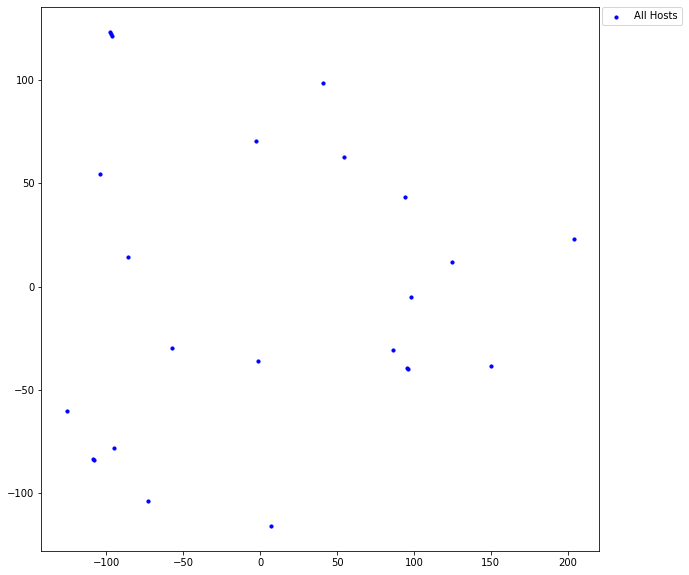

In [417]:
#scatter plot source Ip address
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(src_ip_df['pca1'], src_ip_df['pca2'], s=10, color='blue',label="All Hosts")
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
plt.show()

In [418]:
from sklearn.mixture import BayesianGaussianMixture

# Check clusters
bgms = BayesianGaussianMixture(n_components= 3, n_init=10, random_state= 100)
bgms.fit(X_matrix_src)
np.round(bgms.weights_,2)

array([0.49, 0.22, 0.3 ])

In [419]:
print(bgms.means_)
pca_means = pca_src.transform(bgms.means_)
print()
print(pca_means)

[[ 48.50410543  87.33791713  79.62795058  70.72861096]
 [ 34.48782939 222.03749202  59.4102736  176.6295034 ]
 [169.36410695 211.51340903  68.41497377 104.09229798]]

[[ 85.37429028   5.2045556 ]
 [-67.92580118  82.24316415]
 [-71.80217105 -60.08042553]]


In [420]:
means_df_s = pd.DataFrame(pca_means, columns = ['pca1','pca2'])
means_df_s

,pca1,pca2
0,85.374290,5.204556
1,-67.925801,82.243164
2,-71.802171,-60.080426


In [421]:
#predict cluster for source IP
bgms.predict(X_matrix_src)

array([0, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0,
       1, 2])

In [422]:
src_ip_df['kcluster']=bgms.predict(X_matrix_src).tolist()
src_ip_df.tail(10)

,index,Source,oct1,oct2,oct3,oct4,pca1,pca2,kcluster
14,159,17.253.21.204,17,253,21,204,-97.880429,123.399652,1
15,174,172.253.122.139,172,253,122,139,-125.726425,-60.291994,2
16,205,18.67.76.44,18,67,76,44,125.001712,11.955527,0
17,227,34.98.75.36,34,98,75,36,98.120207,-5.265750,0
18,242,23.207.202.52,23,207,202,52,-1.302111,-35.931141,0
19,271,52.85.151.41,52,85,151,41,96.084427,-40.211313,0
20,568,72.21.91.29,72,21,91,29,150.276724,-38.301173,0
21,570,104.26.11.240,104,26,11,240,41.035315,98.549159,0
22,586,17.253.21.202,17,253,21,202,-96.945206,122.148321,1
23,601,172.253.122.102,172,253,122,102,-108.424808,-83.441615,2


In [423]:
#clusters identified by GMM
dfs0 = src_ip_df[src_ip_df.kcluster==0]
dfs1 = src_ip_df[src_ip_df.kcluster==1]
dfs2 = src_ip_df[src_ip_df.kcluster==2]

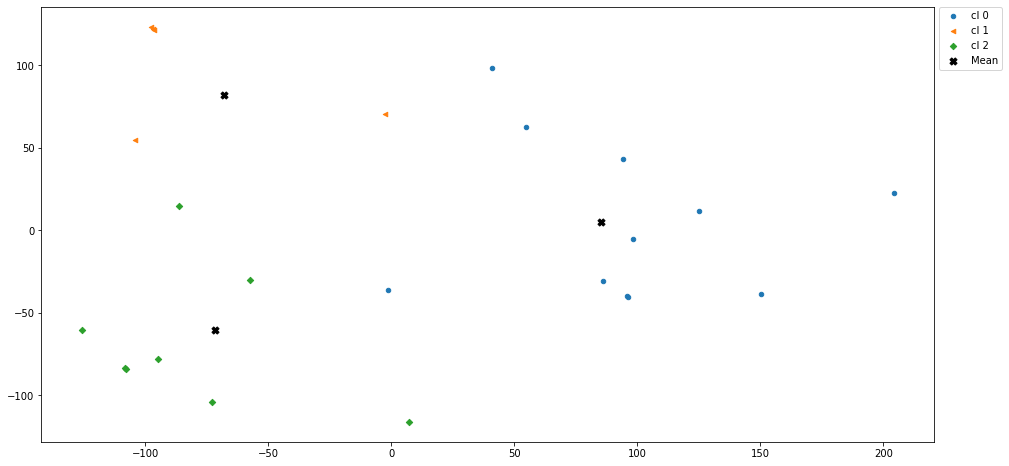

In [424]:
plt.rcParams["figure.figsize"] = (16,8)
pyplot.scatter(dfs0['pca1'],dfs0['pca2'],s=20,label="cl 0")
pyplot.scatter(dfs1['pca1'],dfs1['pca2'],s=20,marker="<",label="cl 1")
pyplot.scatter(dfs2['pca1'],dfs2['pca2'],s=20,marker="D",label="cl 2")
pyplot.scatter(means_df_s['pca1'],means_df_s['pca2'],s=50,marker="X",label="Mean", color='black')

pyplot.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
pyplot.show()

In [425]:
dfs0

,index,Source,oct1,oct2,oct3,oct4,pca1,pca2,kcluster
0,0,87.73.96.64,87,73,96,64,86.204557,-30.905306,0
1,2,52.85.151.42,52,85,151,42,95.616816,-39.585648,0
7,55,13.107.4.52,13,107,4,52,94.339030,43.378890,0
11,74,10.0.0.6,10,0,0,6,204.192112,22.797566,0
12,83,34.104.35.123,34,104,35,123,54.742554,62.618451,0
16,205,18.67.76.44,18,67,76,44,125.001712,11.955527,0
17,227,34.98.75.36,34,98,75,36,98.120207,-5.265750,0
18,242,23.207.202.52,23,207,202,52,-1.302111,-35.931141,0
19,271,52.85.151.41,52,85,151,41,96.084427,-40.211313,0
20,568,72.21.91.29,72,21,91,29,150.276724,-38.301173,0


In [426]:
dfs1

,index,Source,oct1,oct2,oct3,oct4,pca1,pca2,kcluster
2,3,35.244.181.201,35,244,181,201,-104.028125,54.467236,1
5,25,17.253.21.201,17,253,21,201,-96.477595,121.522656,1
8,66,35.163.37.142,35,163,37,142,-2.620796,70.512974,1
14,159,17.253.21.204,17,253,21,204,-97.880429,123.399652,1
22,586,17.253.21.202,17,253,21,202,-96.945206,122.148321,1


In [427]:
dfs2

,index,Source,oct1,oct2,oct3,oct4,pca1,pca2,kcluster
3,17,216.229.0.50,216,229,0,50,-72.859661,-103.848446,2
4,22,192.168.5.2,192,168,5,2,7.131534,-116.115700,2
6,40,172.253.122.101,172,253,122,101,-107.957197,-84.067280,2
9,70,151.205.4.167,151,205,4,167,-86.145941,14.497155,2
10,71,192.168.5.140,192,168,5,140,-57.398820,-29.773873,2
13,137,172.217.164.131,172,217,164,131,-94.977874,-78.108348,2
15,174,172.253.122.139,172,253,122,139,-125.726425,-60.291994,2
23,601,172.253.122.102,172,253,122,102,-108.424808,-83.441615,2


In [428]:
#Find anomalies/outliers
densities_s = bgms.score_samples(X_matrix_src)
dens_threshold_s = np.percentile(densities_s,4)

print("Maximum density: " + str(max(densities_s)))
print("Minimum density: " + str(min(densities_s)))
print("Threshold density: " + str(dens_threshold_s))

anomalies_s = X_matrix_src[densities_s < dens_threshold_s]

Maximum density: -20.493665983212416
Minimum density: -25.615892310830546
Threshold density: -23.928449777578834


In [429]:
print(anomalies_s)
print(len(anomalies_s))

[['104' '26' '11' '240']]
1


In [430]:
anomalies_df_s = src_ip_df[densities_s < dens_threshold_s]
anomalies_df_s

,index,Source,oct1,oct2,oct3,oct4,pca1,pca2,kcluster
21,570,104.26.11.240,104,26,11,240,41.035315,98.549159,0


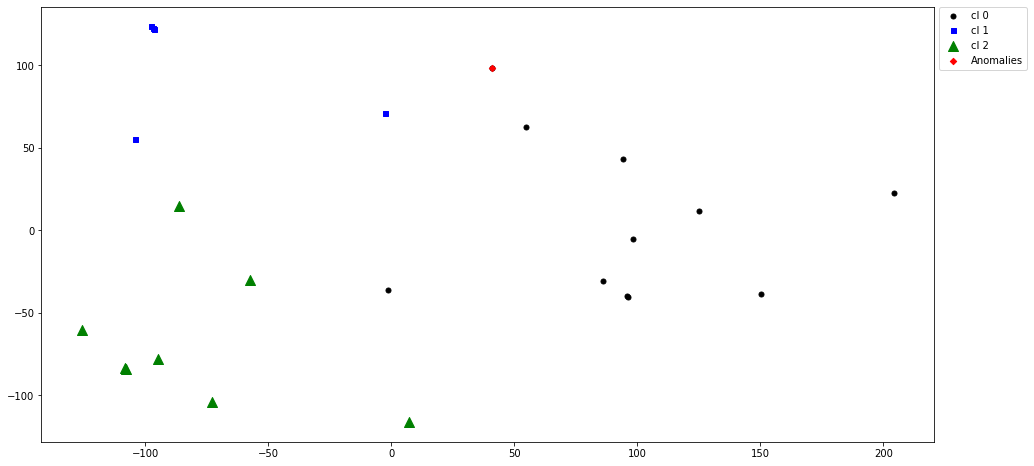

In [431]:
plt.rcParams["figure.figsize"] = (16,8)
pyplot.scatter(dfs0['pca1'],dfs0['pca2'],s=25,label="cl 0", color='black')
pyplot.scatter(dfs1['pca1'],dfs1['pca2'],s=25,marker=",",label="cl 1", color='blue')
pyplot.scatter(dfs2['pca1'],dfs2['pca2'],s=100,marker="^",label="cl 2", color='green')
pyplot.scatter(anomalies_df_s['pca1'],anomalies_df_s['pca2'],s=20,marker="D",label="Anomalies", color='red')

pyplot.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
pyplot.show()